NAMA : KHANIF FAUZI PAMBUDI
(GRADED CHALLENGE 2) 

Pada graded challeng 2 akan dilakukan image processing menggunakan konsep aljabar linear dan kalkulus. Data set yang digunakan dapat diakses pada link berikut ini https://cdn.cnn.com/cnnnext/dam/assets/201030094143-stock-rhodesian-ridgeback-exlarge-169.jpg

# **LIBRARY NUMPY**

merupakan library yang digunakan dalam image processing

In [1]:
import numpy as np
from numpy import linalg as LA
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import sympy as sy
import scipy

# **DATA LOADING IMAGE**

In [2]:
img = Image.open("/content/gc2.jpg")
red, green, blue = img.split()
red = np.array(red)
green = np.array(green)
blue = np.array(blue)
print(img)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=780x438 at 0x7FB8ED826550>


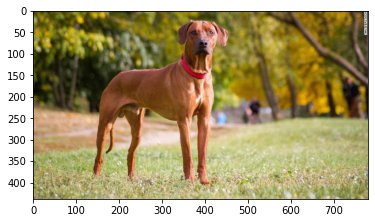

In [3]:
plt.imshow(img)

# **DATA EXPLORATION**

In [4]:
np.array(img).shape

(438, 780, 3)

In [5]:
np.array(img).size

1024920

In [16]:
np.histogram(img, bins=10, range=None, normed=None, weights=None, density=None)

(array([104635,  89945, 100865, 102510, 140872, 137699, 132646, 128689,
         71351,  15708]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]))

In [17]:
pixel_array=np.array([red, green, blue])

In [18]:
grey=np.array(0.299 * red + 0.587 * green + 0.114 * blue)

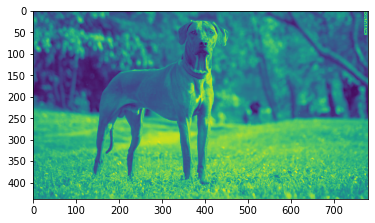

In [19]:
plt.imshow(grey)

# **MENGUBAH DATA IMAGE MENJADI ARRAY**

In [73]:
pic = Image.open("/content/gc2.jpg")
pic
pix = np.array(pic.getdata()).reshape(pic.size[0], pic.size[1], 3)
print(pix)

[[[ 86  93  39]
  [ 88  93  39]
  [ 87  90  33]
  ...
  [119 111  26]
  [120 111  20]
  [122 112  15]]

 [[124 115  12]
  [128 117  11]
  [134 123  15]
  ...
  [ 85  91  29]
  [ 96 102  38]
  [105 110  46]]

 [[112 116  39]
  [115 118  37]
  [119 122  33]
  ...
  [165 148  66]
  [170 152  66]
  [174 154  67]]

 ...

 [[195 193 119]
  [196 192 119]
  [193 189 115]
  ...
  [186 173 139]
  [185 174 146]
  [195 187 164]]

 [[208 201 183]
  [214 208 194]
  [213 209 198]
  ...
  [200 196 135]
  [206 196 135]
  [205 191 130]]

 [[200 186 123]
  [197 186 120]
  [198 191 123]
  ...
  [160 148 100]
  [157 145  97]
  [150 138  90]]]


# **MENCARI GRADIEN PADA SETIAP WARNA RGB**

Mencari gradien merupakan langkag awal dalam melakukan perhitungan gradien magnitude

In [35]:
grad_red = np.gradient(red)
grad_red

[array([[ -9. , -11. ,  -9. , ...,  -2. ,  18. , -22. ],
        [-11. , -11. ,  -9.5, ...,   4. ,  -1. ,   5.5],
        [ -9.5,  -9. ,  -8. , ..., 104.5, -14. ,  21. ],
        ...,
        [ -0.5,  -3. ,  -2.5, ...,   2. ,   1.5,   1. ],
        [ -0.5,  -1. ,  -2.5, ...,   5. ,   4. ,   2.5],
        [  0. ,   0. ,  -3. , ...,   5. ,   4. ,   2. ]]),
 array([[  2. ,   0.5,  -1. , ...,  -1.5,   5.5,  13. ],
        [  0. ,   0.5,   1.5, ...,   6. ,  -4.5, -27. ],
        [  2. ,   2. ,   2. , ...,  -3. ,   7. ,  26. ],
        ...,
        [ -6. ,  -7. ,  -8.5, ...,   1. ,  -2.5,  -4. ],
        [ -7. ,  -7.5,  -7.5, ...,   0.5,  -3.5,  -5. ],
        [ -7. ,  -9. ,  -8. , ...,  -0.5,  -5. ,  -7. ]])]

In [36]:
dx_red,dy_red = grad_red
dx_red,dy_red

(array([[ -9. , -11. ,  -9. , ...,  -2. ,  18. , -22. ],
        [-11. , -11. ,  -9.5, ...,   4. ,  -1. ,   5.5],
        [ -9.5,  -9. ,  -8. , ..., 104.5, -14. ,  21. ],
        ...,
        [ -0.5,  -3. ,  -2.5, ...,   2. ,   1.5,   1. ],
        [ -0.5,  -1. ,  -2.5, ...,   5. ,   4. ,   2.5],
        [  0. ,   0. ,  -3. , ...,   5. ,   4. ,   2. ]]),
 array([[  2. ,   0.5,  -1. , ...,  -1.5,   5.5,  13. ],
        [  0. ,   0.5,   1.5, ...,   6. ,  -4.5, -27. ],
        [  2. ,   2. ,   2. , ...,  -3. ,   7. ,  26. ],
        ...,
        [ -6. ,  -7. ,  -8.5, ...,   1. ,  -2.5,  -4. ],
        [ -7. ,  -7.5,  -7.5, ...,   0.5,  -3.5,  -5. ],
        [ -7. ,  -9. ,  -8. , ...,  -0.5,  -5. ,  -7. ]]))

In [37]:
grad_green = np.gradient(green)
grad_green 

[array([[ -9. ,  -9. ,  -7. , ...,  -2. ,  18. , -22. ],
        [-10. , -10. ,  -8.5, ...,   3.5,  -1. ,   4. ],
        [ -8.5,  -9. ,  -8. , ..., 108. , -14. ,  19.5],
        ...,
        [ -1. ,  -2. ,  -3. , ...,   1.5,   1. ,   0.5],
        [ -1. ,  -1. ,  -1.5, ...,   4.5,   3.5,   2. ],
        [  0. ,   0. ,   0. , ...,   5. ,   4. ,   2. ]]),
 array([[  0. ,  -1.5,  -3. , ...,  -1. ,   5.5,  13. ],
        [  0. ,  -0.5,  -1.5, ...,   6.5,  -4.5, -27. ],
        [  0. ,   0. ,   0.5, ...,  -2.5,   6. ,  23. ],
        ...,
        [ -7. ,  -8.5, -10. , ...,   1.5,  -2.5,  -4. ],
        [ -7. ,  -9. ,  -9. , ...,   0.5,  -3.5,  -5. ],
        [ -7. ,  -9. ,  -9.5, ...,   0. ,  -5. ,  -7. ]])]

In [38]:
dx_green,dy_green = grad_green
dx_green,dy_green

(array([[ -9. ,  -9. ,  -7. , ...,  -2. ,  18. , -22. ],
        [-10. , -10. ,  -8.5, ...,   3.5,  -1. ,   4. ],
        [ -8.5,  -9. ,  -8. , ..., 108. , -14. ,  19.5],
        ...,
        [ -1. ,  -2. ,  -3. , ...,   1.5,   1. ,   0.5],
        [ -1. ,  -1. ,  -1.5, ...,   4.5,   3.5,   2. ],
        [  0. ,   0. ,   0. , ...,   5. ,   4. ,   2. ]]),
 array([[  0. ,  -1.5,  -3. , ...,  -1. ,   5.5,  13. ],
        [  0. ,  -0.5,  -1.5, ...,   6.5,  -4.5, -27. ],
        [  0. ,   0. ,   0.5, ...,  -2.5,   6. ,  23. ],
        ...,
        [ -7. ,  -8.5, -10. , ...,   1.5,  -2.5,  -4. ],
        [ -7. ,  -9. ,  -9. , ...,   0.5,  -3.5,  -5. ],
        [ -7. ,  -9. ,  -9.5, ...,   0. ,  -5. ,  -7. ]]))

In [39]:
grad_blue = np.gradient(blue)
grad_blue 

[array([[ -9. ,  -9. ,  -8. , ...,  -2. ,  19. , -22. ],
        [ -9.5, -10. ,  -8. , ...,   5. ,  -0.5,   5. ],
        [ -8. ,  -9. ,  -7. , ..., 110.5, -13. ,  21.5],
        ...,
        [  0. ,  -1.5,  -1.5, ...,   4.5,   3. ,   2.5],
        [  1. ,   0. ,  -0.5, ...,   7.5,   6.5,   5. ],
        [  2. ,   2. ,  -1. , ...,   7. ,   8. ,   6. ]]),
 array([[  0. ,  -3. ,  -5. , ...,  -5. ,   4. ,  13. ],
        [  0. ,  -2.5,  -3.5, ...,   2. ,  -6. , -28. ],
        [ -1. ,  -1.5,  -2. , ...,  -7. ,   4. ,  24. ],
        ...,
        [ -5. ,  -7.5,  -8.5, ...,   0.5,  -2.5,  -4. ],
        [ -7. ,  -7.5,  -7.5, ...,  -0.5,  -4.5,  -5. ],
        [ -7. ,  -9. ,  -8. , ...,  -1.5,  -5. ,  -7. ]])]

In [40]:
dx_blue,dy_blue = grad_blue
dx_blue,dy_blue

(array([[ -9. ,  -9. ,  -8. , ...,  -2. ,  19. , -22. ],
        [ -9.5, -10. ,  -8. , ...,   5. ,  -0.5,   5. ],
        [ -8. ,  -9. ,  -7. , ..., 110.5, -13. ,  21.5],
        ...,
        [  0. ,  -1.5,  -1.5, ...,   4.5,   3. ,   2.5],
        [  1. ,   0. ,  -0.5, ...,   7.5,   6.5,   5. ],
        [  2. ,   2. ,  -1. , ...,   7. ,   8. ,   6. ]]),
 array([[  0. ,  -3. ,  -5. , ...,  -5. ,   4. ,  13. ],
        [  0. ,  -2.5,  -3.5, ...,   2. ,  -6. , -28. ],
        [ -1. ,  -1.5,  -2. , ...,  -7. ,   4. ,  24. ],
        ...,
        [ -5. ,  -7.5,  -8.5, ...,   0.5,  -2.5,  -4. ],
        [ -7. ,  -7.5,  -7.5, ...,  -0.5,  -4.5,  -5. ],
        [ -7. ,  -9. ,  -8. , ...,  -1.5,  -5. ,  -7. ]]))

# **MENGHITUNG MAGNITUDE**

Setelah menemukan nilai gradient (dy dan dx) nya kemudian dicari nilai magnitude

In [42]:
mag_red = np.sqrt(dx_red**2 + dy_red**2)
mag_red

array([[  9.21954446,  11.01135777,   9.05538514, ...,   2.5       ,
         18.82153022,  25.55386468],
       [ 11.        ,  11.01135777,   9.61769203, ...,   7.21110255,
          4.60977223,  27.55449147],
       [  9.70824392,   9.21954446,   8.24621125, ..., 104.54305333,
         15.65247584,  33.42154993],
       ...,
       [  6.02079729,   7.61577311,   8.86002257, ...,   2.23606798,
          2.91547595,   4.12310563],
       [  7.01783442,   7.56637298,   7.90569415, ...,   5.02493781,
          5.31507291,   5.59016994],
       [  7.        ,   9.        ,   8.54400375, ...,   5.02493781,
          6.40312424,   7.28010989]])

In [46]:
mag_red.sum()

2685514.763153863

In [43]:
mag_green = np.sqrt(dx_green**2 + dy_green**2)
mag_green

array([[  9.        ,   9.1241438 ,   7.61577311, ...,   2.23606798,
         18.82153022,  25.55386468],
       [ 10.        ,  10.0124922 ,   8.63133825, ...,   7.38241153,
          4.60977223,  27.29468813],
       [  8.5       ,   9.        ,   8.01560977, ..., 108.02893131,
         15.23154621,  30.15377257],
       ...,
       [  7.07106781,   8.7321246 ,  10.44030651, ...,   2.12132034,
          2.6925824 ,   4.03112887],
       [  7.07106781,   9.05538514,   9.1241438 , ...,   4.52769257,
          4.94974747,   5.38516481],
       [  7.        ,   9.        ,   9.5       , ...,   5.        ,
          6.40312424,   7.28010989]])

In [47]:
mag_green.sum()

2492161.068609122

In [44]:
mag_blue = np.sqrt(dx_blue**2 + dy_blue**2)
mag_blue

array([[  9.        ,   9.48683298,   9.43398113, ...,   5.38516481,
         19.41648784,  25.55386468],
       [  9.5       ,  10.30776406,   8.7321246 , ...,   5.38516481,
          6.02079729,  28.44292531],
       [  8.06225775,   9.1241438 ,   7.28010989, ..., 110.72149746,
         13.60147051,  32.22188697],
       ...,
       [  5.        ,   7.64852927,   8.63133825, ...,   4.52769257,
          3.90512484,   4.71699057],
       [  7.07106781,   7.5       ,   7.51664819, ...,   7.51664819,
          7.90569415,   7.07106781],
       [  7.28010989,   9.21954446,   8.06225775, ...,   7.15891053,
          9.43398113,   9.21954446]])

In [48]:
mag_blue.sum()

2728356.4023964778

In [77]:
np.where(mag)

(array([  0,   0,   0, ..., 437, 437, 437]),
 array([  0,   1,   2, ..., 777, 778, 779]))

Dari fungsi np.where(mag) didapatkan nilai magnitude nya, dimana nilai magnitude ini lebih dari threshold yang artinya tepi dari gambar dapat terdeteksi.

# **MEMBUAT VISUALISASI DENGAN MATPLOTLIB**

untuk melakukan visualisasi data, dibutuhkan nilai magnitude, koordinat x, dan juga koordinat y dengan menggunakan plt.imshow()

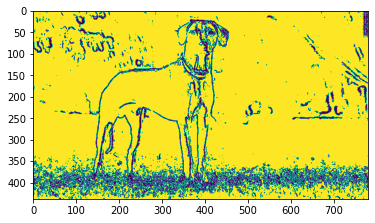

In [45]:
plt.imshow(np.where(mag > 15, 0, 1))

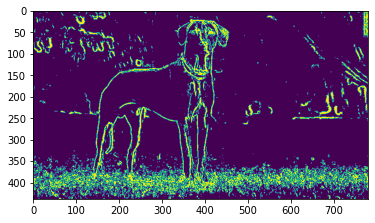

In [75]:
plt.imshow(np.where(mag > 15, 2, 1))

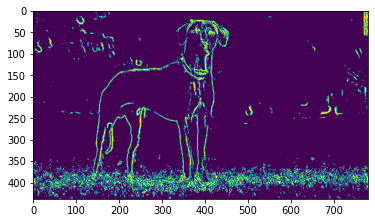

In [81]:
plt.imshow(np.where(mag < 20, 2, 3))

# **DETEKSI TEPI MENGGUNAKAN OPEN CV**

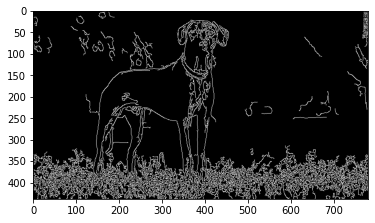

In [82]:
import cv2
import matplotlib.pyplot as plt
 
im = cv2.imread('/content/gc2.jpg')
edges = cv2.Canny(im,25,255,L2gradient=False)
plt.imshow(edges,cmap='gray')
plt.show()

# **ANALISA HASIL**

Setelah dilakukan percobaan dengan nilai magnitude, dapat disimpulkan bahwa nilai magnitude yang dimasukkan kurang dari 30 akan terdeteksi dengan warna biru yang dominan dengan garis tepi yang terlihat jelas sedangkan nilai magnitude yang dimasukkan lebih dari 30 akan terdeteksi dengan warna hijau yang dominan dengan garis tepi terlihat sedikit samar